In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import *

In [2]:
N = 64
js = np.array([i for i in range(floor(N/2))])

# Generate Power Spectrum

Generate a power spectrum given by 

$$S_j(a, b) = \frac{be^{\epsilon}}{1+a^2-2a \cos(2 \pi f_j)} $$

where $\epsilon$ is some normally distributed random variable.

In [3]:
a = 0.75
b = 0.15
eps_var = 0
def spec(j):
    if type(j) is not type(np.array([])):
        return b*np.exp(float(np.random.normal(0, eps_var, 1)))/(1+a**2-2*a*np.cos(2*np.pi*j/N))
    else:   
        return b*np.exp(np.random.normal(0, eps_var, len(j)))/(1+a**2-2*a*np.cos(2*np.pi*j/N))

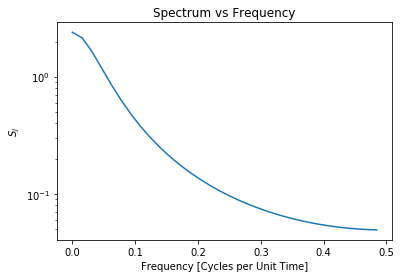

In [4]:
plt.semilogy(js/N, spec(js))
plt.xlabel('Frequency [Cycles per Unit Time]')
plt.ylabel('$S_j$')
plt.title('Spectrum vs Frequency')
plt.show()

# Compute Autocorrelation Function

From this we can immediately compute the value of $\sigma^2$ using the fact that $\sum_{j=1}^{\left \lfloor{N/2}\right \rfloor } S_j = \sigma^2$

In [5]:
var = sum([spec(j) for j in range(floor(N/2))])
var

12.146938996928773

We can also immediately compute $\rho_k$ given by equation (11b)

In [6]:
rho = np.array([sum([spec(j)*np.cos(2*np.pi*j/N*k) for j in range(floor(N/2)+1)])/var
                for k in range(floor(N/2))])

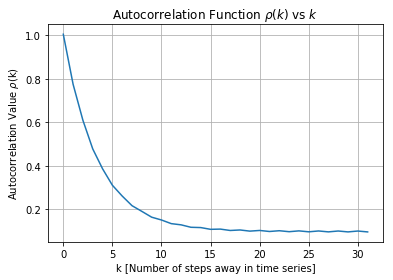

In [7]:
plt.plot(rho)
plt.xlabel('k [Number of steps away in time series]')
plt.ylabel(r'Autocorrelation Value $\rho$(k)')
plt.title(r'Autocorrelation Function $\rho(k)$ vs $k$')
plt.grid()
plt.show()

# Generate a Random Time Series

Now generate a time series with zero mean using (10b). First create the random coefficients of the series using the power spectrum. Assume that the coefficients are normally distributed (pg 5 of notes- this means that the $S_j$'s are uncorrelated).

In [8]:
As = np.array([float(np.random.normal(0, np.sqrt(spec(j)), 1)) for j in js])
Bs = np.array([float(np.random.normal(0, np.sqrt(spec(j)), 1)) for j in js])

This is equation (10b) written in code:

In [9]:
def X(As, Bs, t):
    return sum([A*np.cos(2*np.pi*j/N * t) + B*np.sin(2*np.pi*j/N * t) for (j, A, B) in zip(js, As, Bs)])

Create the time steps:

In [10]:
t = np.linspace(0, 128, 128)
TS = X(As, Bs, t)

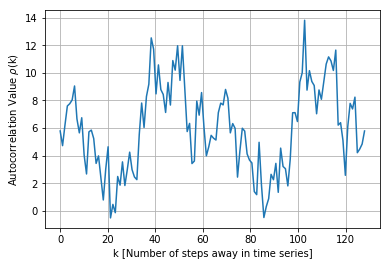

In [11]:
plt.plot(t, TS)
plt.xlabel('k [Number of steps away in time series]')
plt.ylabel(r'Autocorrelation Value $\rho$(k)')
plt.grid()
plt.show()

# Parametric Estimate

We will use the two parameter estimation

$$S_j(\alpha, \beta) = \frac{\beta}{1+\alpha^2-2\alpha \cos(2 \pi f_j)} $$

Firstly we note that $\hat{\alpha}=\hat{\rho}_1$ so

In [12]:
a_est = rho[1]

Now we solve for $\beta$ using the equation on pg 23.

In [13]:
var_est = np.var(TS)

def S_par(j, a, b):
    return b/(1+a**2-2*a*np.cos(2*np.pi*j/N))

b_est = var_est * (np.sum([S_par(i, a_est, 1) for i in range(1, floor(N/2))]))**-1

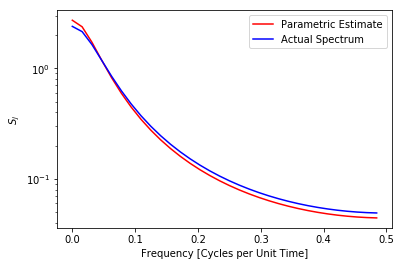

In [14]:
plt.plot(js/N, S_par(js, a_est, b_est), c='r', label='Parametric Estimate')
plt.semilogy(js/N, spec(js), c='b', label='Actual Spectrum')
plt.xlabel('Frequency [Cycles per Unit Time]')
plt.ylabel('$S_j$')
plt.legend()
plt.show()